In [1]:
# Imports
import pandas as pd
import durak
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [8]:
def play_multiple(
    num_games, 
    verbose = False,
    num_suits = 3,
    num_cards_per_suit = 4,
    num_starting_cards = 2
    ):

    strategies = ["normal", "normal", "random"]
    knowledge_depths = [1,1,1]
    data = {}

    for i in range(num_games):
        model = durak.DurakModel(
            verbose = verbose, 
            num_suits = num_suits, 
            num_cards_per_suit = num_cards_per_suit, 
            num_starting_cards = num_starting_cards,
            player_strategies = strategies,
            player_depths = knowledge_depths
            )

        data["game" + str(i)] = durak.play(model)


    return data

In [10]:
data = play_multiple(10, verbose= False)
df = pd.DataFrame.from_dict(data, orient="index")
df

Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.
Generated 531441 worlds.


,num_players,num_suits,num_cards_per_suit,num_starting_cards,durak,winners,player_strategies,player_depths
game0,3,3,4,2,2,"[0, 1]","[normal, random, random]","[1, 1, 1]"
game1,3,3,4,2,1,"[0, 2]","[normal, random, random]","[1, 1, 1]"
game2,3,3,4,2,1,"[0, 2]","[normal, random, random]","[1, 1, 1]"
game3,3,3,4,2,1,"[0, 2]","[normal, random, random]","[1, 1, 1]"
game4,3,3,4,2,0,"[1, 2]","[normal, random, random]","[1, 1, 1]"
game5,3,3,4,2,2,"[1, 0]","[normal, random, random]","[1, 1, 1]"
game6,3,3,4,2,2,"[1, 0]","[normal, random, random]","[1, 1, 1]"
game7,3,3,4,2,1,"[2, 0]","[normal, random, random]","[1, 1, 1]"
game8,3,3,4,2,0,"[2, 1]","[normal, random, random]","[1, 1, 1]"
game9,3,3,4,2,1,"[2, 0]","[normal, random, random]","[1, 1, 1]"


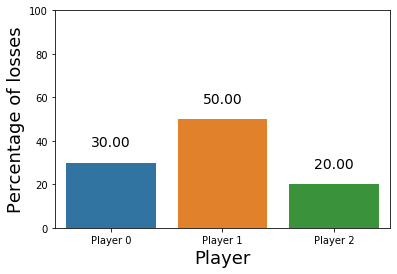

In [11]:
"""
Percentage of losses per player
"""

fig, ax = plt.subplots()
durak_percentages = [x/len(df)*100 for x in list(Counter(df["durak"]).values())]
players = sorted(list(df.durak.unique()))

g = sns.barplot(x=players, y=durak_percentages, dodge=False)
g.set_xlabel("Player", fontsize=18)
g.set_xticklabels(["Player " + str(x) for x in players])

g.set_ylabel("Percentage of losses", fontsize=18)

ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0, 100) #To make space for the annotations

In [5]:
"""
Influence of total number of cards on the effectiveness of depth
"""

num_total_cards = [] 
columns = ["num_cards"]
players = sorted(list(df.durak.unique()))
columns.extend(players)
wins_per_num_cards = []
num_suits = 3

# We keep it at 3 suits (?), but loop over the number of cards per suit
for num in range(3,14):

    num_total_cards.append(num)

    data = play_multiple(100, verbose= False, num_cards_per_suit=num, num_suits=num_suits)
    df = pd.DataFrame.from_dict(data, orient="index")
    win_percentages = [100 - (x/len(df)*100) for x in list(Counter(df["durak"]).values())]

    li = [num_suits * num]
    li.extend(win_percentages)
    wins_per_num_cards.append(li)
    print(li)

wins_per_num_cards

df2 = pd.DataFrame(wins_per_num_cards, columns=columns)
df2

sns.lineplot(x="num_cards", y="value",
             hue="variable",
             data = pd.melt(df2, ["num_cards"]))

Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 worlds.
Generated 19683 

KeyboardInterrupt: 